Grupa 5 Bartłomiej Strzelczyk, Mikołaj Golowski, Jakub Ludera 

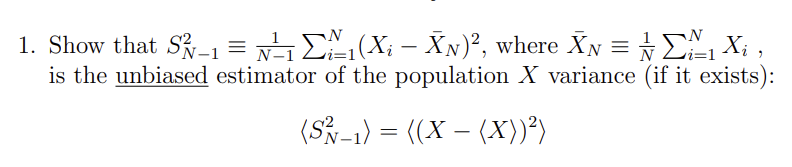

In [3]:
#policzyc srednia, ma byc rowna wariancji rozkładu w^2 = <xi^2> - <xi>^2 = <(xi - <xi>)^2>, ma być jakieś wyciąganie stałych

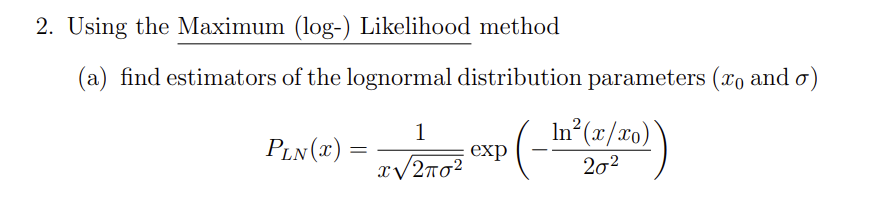

In [2]:
#gestosc prawd. likehood L = sum albo iloraz nie pamietam(Px1, Px2, ..., Pxn) log(L) = E ln(Pxi) 

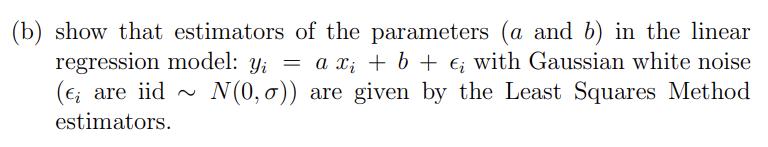

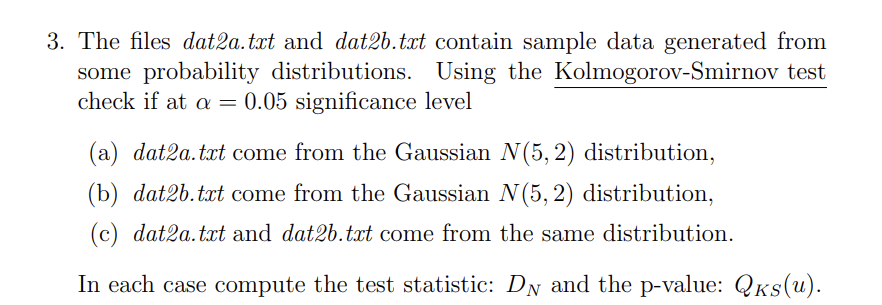

nie tylko odp, tylko policzyc jakies rzeczy, np statystyka testu, u, wartosc p-value

In [6]:
import numpy as np
from math import erf, sqrt, exp

data_a = np.loadtxt('./dat2a.txt')
data_b = np.loadtxt('./dat2b.txt')

def cdf_normal(x, mu=5, sigma=2):
    return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

# Asymptotic p-value for KS
def p_ks(u, terms=1000):
    return 2 * sum(((-1)**(k-1)) * exp(-2 * k * k * u * u) for k in range(1, terms))

# One-sample KS test
def ks_one_sample(data, cdf, finite_correction=True):
    n = len(data)
    x = np.sort(data)
    D_plus  = max((i+1)/n - cdf(xi) for i, xi in enumerate(x))
    D_minus = max(cdf(xi) - i/n for i, xi in enumerate(x))
    D = max(D_plus, D_minus)
    u = D * sqrt(n)
    if finite_correction:
        u = u + 1/(6*sqrt(n)) + 1/(4*n)
    p_val = p_ks(u)
    return D, u, p_val

# Two-sample KS test
def ks_two_sample(data1, data2):
    n, m = len(data1), len(data2)
    x_all = np.sort(np.concatenate([data1, data2]))
    data1_sorted = np.sort(data1)
    data2_sorted = np.sort(data2)
    D = max(abs(np.searchsorted(data1_sorted, xi, side='right')/n -
                np.searchsorted(data2_sorted, xi, side='right')/m)
            for xi in x_all)
    Ne = n * m / (n + m)
    u = D * sqrt(Ne)
    p_val = p_ks(u)
    return D, u, p_val

D_a, u_a_corr, p_a = ks_one_sample(data_a, cdf_normal, finite_correction=True)
D_b, u_b_corr, p_b = ks_one_sample(data_b, cdf_normal, finite_correction=True)
D_ab, u_ab, p_ab = ks_two_sample(data_a, data_b)

print("One-sample KS test for dat2a")
print(f"D_N = {D_a:.5f}, corrected u = {u_a_corr:.5f}, p-value = {p_a:.5f}\n")

print("One-sample KS test for dat2b")
print(f"D_N = {D_b:.5f}, corrected u = {u_b_corr:.5f}, p-value = {p_b:.5f}\n")

print("Two-sample KS test")
print(f"D = {D_ab:.5f}, u = {u_ab:.5f}, p-value = {p_ab:.5f}")


One-sample KS test for dat2a
D_N = 0.02931, corrected u = 0.42756, p-value = 0.99313

One-sample KS test for dat2b
D_N = 0.10586, corrected u = 1.51009, p-value = 0.02091

Two-sample KS test
D = 0.11500, u = 1.15000, p-value = 0.14196


## a)
p > 0.05 => dat2a is consistent with N(5,2)

## b)
p < 0.05 => dat2b is not from N(5,2)

## c)
p > 0.05 => dat2a and dat2b might come from same distribution